<a href="https://colab.research.google.com/github/obbcopper/Python-programs-in-Data-Science/blob/main/Score_Predict_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold, train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression

In [128]:
# from google.colab import files
# uploaded = files.upload()

In [136]:
df = pd.read_csv("/content/student_exam_scores.csv")
df.head()

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3


In [139]:
def split(df):
    X = df.drop(columns=['student_id','exam_score'])
    y = df['exam_score']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=112)
    return X_train, X_test, y_train, y_test

def train_GradientBoosting(X_train, y_train):
    GB_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.05, max_depth=4, random_state=112)
    GB_model.fit(X_train, y_train)
    return GB_model

def show_plt(y_test, predictions):
    plt.figure(figsize=(8,4))
    plt.plot(y_test, color='g', label='Exam scores')
    plt.plot(predictions, color='r', label='Predictions')
    plt.legend()
    plt.show()

def run_model(df):
    X_train, X_test, y_train, y_test = split(df)
    GB_model = train_GradientBoosting(X_train, y_train)
    predictions = GB_model.predict(X_test)
    predictions = pd.DataFrame(predictions)
    y_test = y_test.reset_index(drop=True)
    print(f"Model Score: {GB_model.score(X_test, y_test)}")
    show_plt(y_test, predictions)

Model Score: 0.7903620416464944


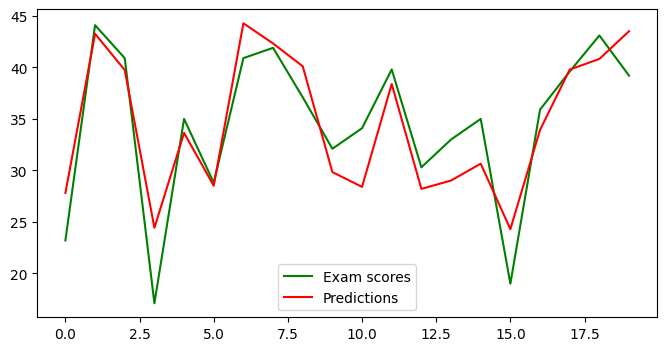

In [138]:
run_model(df)